# Genesis4 Particles

This shows examples of the various ways to input particle data into Genesis4.

In [1]:
import logging
import os
from math import pi, sqrt

import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import c

import genesis.version4 as g4

logging.basicConfig()
# logging.getLogger("genesis").setLevel("DEBUG")

%config InlineBackend.figure_format = 'retina'

# Lattice

Create a simple drift lattice

In [2]:
D1 = g4.Drift(L=1)
lattice = g4.Lattice(elements={"D1": D1, "LAT": g4.Line(elements=[D1])})

# `profile_gauss`

This profile will make a Gaussian distribition. Here we do some calculations to make the correct bunch length for a given bunch charge to provide a peak current.

In [3]:
PEAK_CURRENT = 1000
BUNCH_CHARGE = 100e-12
SIGMA_T = BUNCH_CHARGE / (sqrt(2 * pi) * PEAK_CURRENT)
SIGMA_Z = SIGMA_T * c
SLEN = 6 * SIGMA_Z
S0 = 3 * SIGMA_Z
SIGMA_T, SIGMA_Z, SLEN

(3.989422804014327e-14, 1.1959988684167075e-05, 7.175993210500245e-05)

In [4]:
main = g4.MainInput(
    namelists=[
        g4.Setup(
            rootname="drift_test",
            # lattice="LATFILE",
            beamline="LAT",
            gamma0=1000,
            lambda0=1e-07,
            delz=0.026,
            seed=123456,
            npart=128,
        ),
        g4.Time(slen=SLEN),
        g4.ProfileGauss(
            label="beamcurrent",
            c0=PEAK_CURRENT,
            s0=S0,
            sig=SIGMA_Z,
        ),
        g4.Beam(
            gamma=1000,
            delgam=1,
            current="beamcurrent",
        ),
        g4.Track(zstop=1),
        g4.Write(beam="end"),
    ],
)

G = g4.Genesis4(main, lattice, verbose=True)
output = G.run()

Configured to run in: /tmp/tmp_xfoici_
Running Genesis4 in /tmp/tmp_xfoici_
/home/runner/miniconda3/envs/lume-genesis-dev/bin/genesis4 -l genesis.lat genesis4.in
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by conda at 2024-06-10 16:25:29 [UTC] from Git Commit ID: 07004e4cb437003b4b6cf024122db18caee13722
Starting Time: Fri Sep 13 18:27:03 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file genesis.lat ...
Setting up time window of 71.8 microns with 718 sample points...
Adding profile with label: beamcurrent
Generating input particle distribution...

Running Core Simulation...
Time-dependent run with 718 slices for a time window of 71.8 microns
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
Writing output file...

Core Simulation done.
End of Track
Writing particle distribution to file: end.par.h5 ...



Program is terminating...
Ending Time: Fri Sep 13 18:27:03 2024
Total Wall Clock Time: 0.260086 seconds
-------------------------------------
Success - execution took 0.29s.


In [5]:
G.input.main.setup.delz

0.026

In [6]:
print(G.output.run.output_log)

---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by conda at 2024-06-10 16:25:29 [UTC] from Git Commit ID: 07004e4cb437003b4b6cf024122db18caee13722
Starting Time: Fri Sep 13 18:27:03 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file genesis.lat ...
Setting up time window of 71.8 microns with 718 sample points...
Adding profile with label: beamcurrent
Generating input particle distribution...

Running Core Simulation...
Time-dependent run with 718 slices for a time window of 71.8 microns
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
Writing output file...

Core Simulation done.
End of Track
Writing particle distribution to file: end.par.h5 ...

Program is terminating...
Ending Time: Fri Sep 13 18:27:03 2024
Total Wall Clock Time: 0.260086 seconds
-------------------------------------



<ParticleGroup with 91904 particles at 0x7fdce07c2ed0>

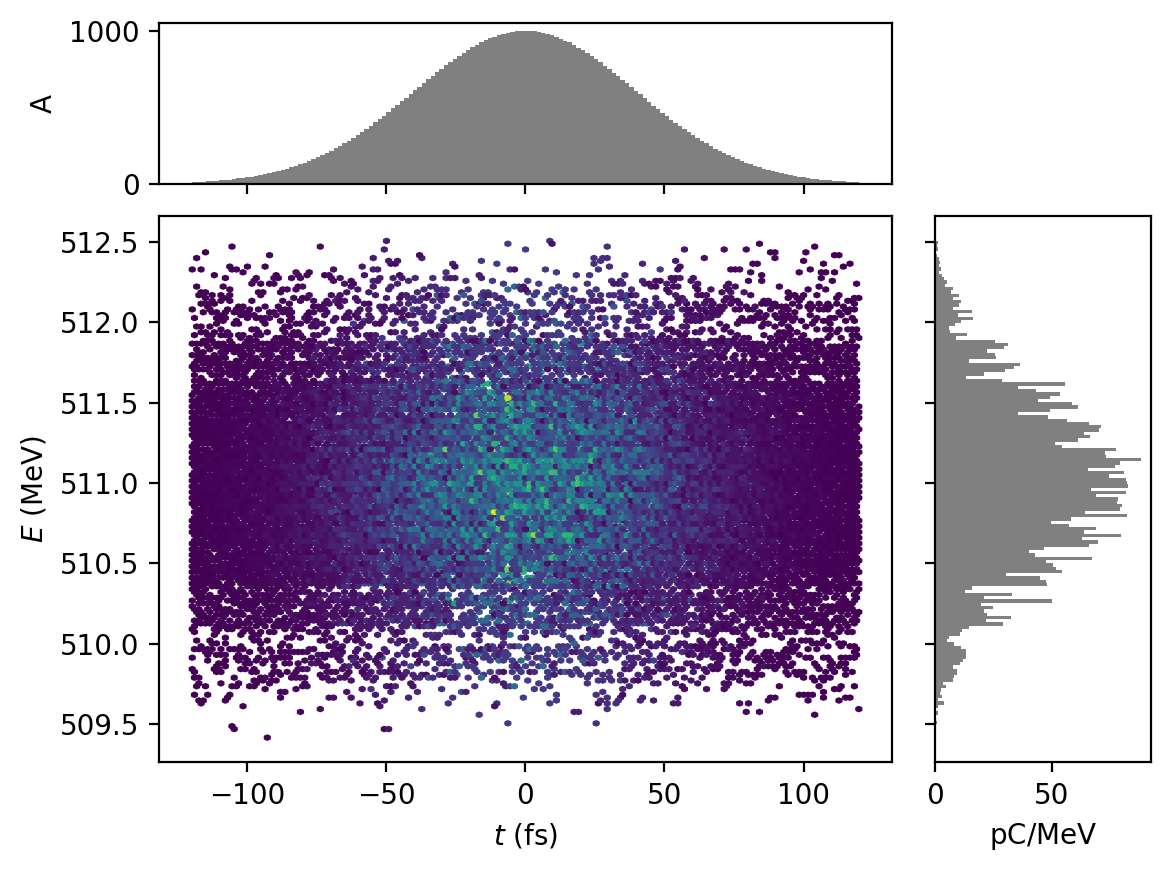

In [7]:
output.load_particles()
P1 = output.particles["end"]
P1.drift_to_z()
P1.plot("t", "energy")
P1

In [8]:
output.particles["end"]

<ParticleGroup with 91904 particles at 0x7fdce07c2ed0>

Check the charge

In [9]:
P1.charge

np.float64(9.973150081144012e-11)

# `profile_file`

LUME-Genesis automatically makes an HDF5 file with `ProfileArray`.

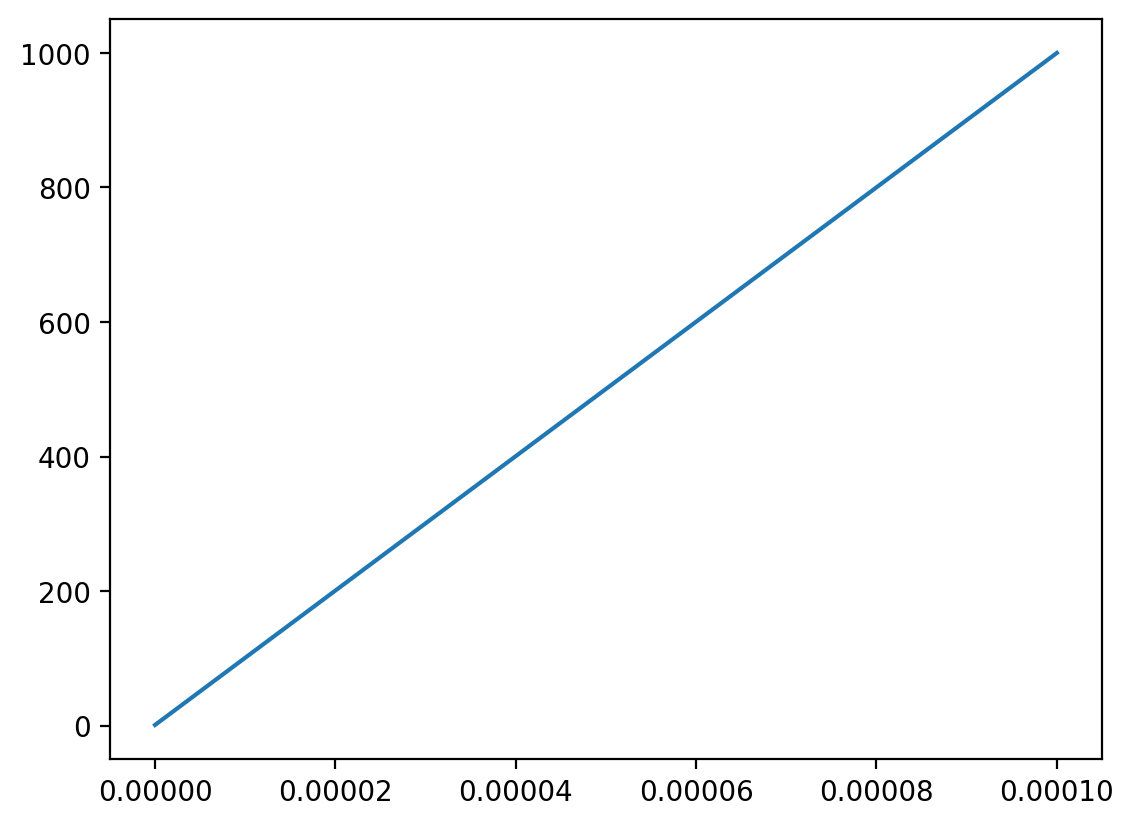

In [10]:
NPTS = 100
SLEN = 100e-6
S = np.linspace(0, SLEN, NPTS)
CURRENT = np.linspace(1, 1000.0, NPTS)
plt.plot(S, CURRENT)

In [11]:
main = g4.MainInput(
    namelists=[
        g4.Setup(
            rootname="drift_test",
            # lattice=lattice,
            beamline="LAT",
            gamma0=1000,
            lambda0=1e-07,
            delz=0.026,
            seed=123456,
            npart=128,
        ),
        g4.Time(slen=SLEN),
        g4.ProfileArray(label="beamcurrent", xdata=S, ydata=CURRENT),
        g4.Beam(
            gamma=1000,
            delgam=1,
            current="beamcurrent",
            ex=1e-06,
            ey=1e-06,
            betax=7.910909406464387,
            betay=16.881178621346898,
            alphax=-0.7393217413918415,
            alphay=1.3870723536888105,
        ),
        g4.Track(zstop=1),
        g4.Write(beam="end"),
    ]
)

G = g4.Genesis4(main, lattice, verbose=True)
output = G.run()

Configured to run in: /tmp/tmpiwawflw8
Running Genesis4 in /tmp/tmpiwawflw8
/home/runner/miniconda3/envs/lume-genesis-dev/bin/genesis4 -l genesis.lat genesis4.in
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by conda at 2024-06-10 16:25:29 [UTC] from Git Commit ID: 07004e4cb437003b4b6cf024122db18caee13722
Starting Time: Fri Sep 13 18:27:05 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file genesis.lat ...
Setting up time window of 100 microns with 1000 sample points...
Adding profile with label: beamcurrent
Generating input particle distribution...

Running Core Simulation...
Time-dependent run with 1000 slices for a time window of 100 microns
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
Writing output file...

Core Simulation done.
End of Track
Writing particle distribution to file: end.par.h5 ...



Program is terminating...
Ending Time: Fri Sep 13 18:27:06 2024
Total Wall Clock Time: 0.352487 seconds
-------------------------------------
Success - execution took 0.39s.


### Inspect the input and output

In [12]:
print(main.to_genesis())

&setup
  rootname = drift_test
  lattice = genesis.lat
  beamline = LAT
  gamma0 = 1000.0
  lambda0 = 1e-07
  delz = 0.026
  seed = 123456
  npart = 128
&end

&time
  slen = 0.0001
&end

&profile_file
  label = beamcurrent
  xdata = ProfileArray_0.h5/x
  ydata = ProfileArray_0.h5/y
&end

&beam
  gamma = 1000.0
  delgam = 1.0
  current = @beamcurrent
  ex = 1e-06
  ey = 1e-06
  betax = 7.910909406464387
  betay = 16.881178621346898
  alphax = -0.7393217413918415
  alphay = 1.3870723536888105
&end

&track
  zstop = 1.0
&end

&write
  beam = end
&end


In [13]:
print(lattice.to_genesis())

D1: drift = {l=1.0};
LAT: LINE = {D1};


In [14]:
print(output.run.output_log)

---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by conda at 2024-06-10 16:25:29 [UTC] from Git Commit ID: 07004e4cb437003b4b6cf024122db18caee13722
Starting Time: Fri Sep 13 18:27:05 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file genesis.lat ...
Setting up time window of 100 microns with 1000 sample points...
Adding profile with label: beamcurrent
Generating input particle distribution...

Running Core Simulation...
Time-dependent run with 1000 slices for a time window of 100 microns
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
Writing output file...

Core Simulation done.
End of Track
Writing particle distribution to file: end.par.h5 ...

Program is terminating...
Ending Time: Fri Sep 13 18:27:06 2024
Total Wall Clock Time: 0.352487 seconds
-------------------------------------



In [15]:
output.meta

OutputMeta(
  extra={},
  beamdumps=OutputMetaDumps(extra={}, filenames={}, intstep=array([], dtype=float64)),
  fielddumps=OutputMetaDumps(extra={}, filenames={}, intstep=array([], dtype=float64)),
  host='Undefined',
  input_file='&setup\n  rootname = drift_test\n  lattice = genesis.lat\n  beamline = LAT\n  gamma0 = 1000.0\n  lambda0 = 1e-07\n  delz = 0.026\n  seed...
  lattice_file='D1: drift = {l=1.0};\nLAT: LINE = {D1};\n',
  time_stamp='Fri Sep 13 18:27:05 2024\n',
  user='runner',
  version=OutputMetaVersion(
    extra={},
    build_info='Compiled by conda at 2024-06-10 16:25:29 [UTC] from Git Commit ID: 07004e4cb437003b4b6cf024122db18caee13722',
    major=4.0,
    minor=6.0,
    revision=6.0,
  ),
  cwd='/tmp/tmpiwawflw8',
  mpisize=1.0,
)

<ParticleGroup with 128000 particles at 0x7fdc928161b0>

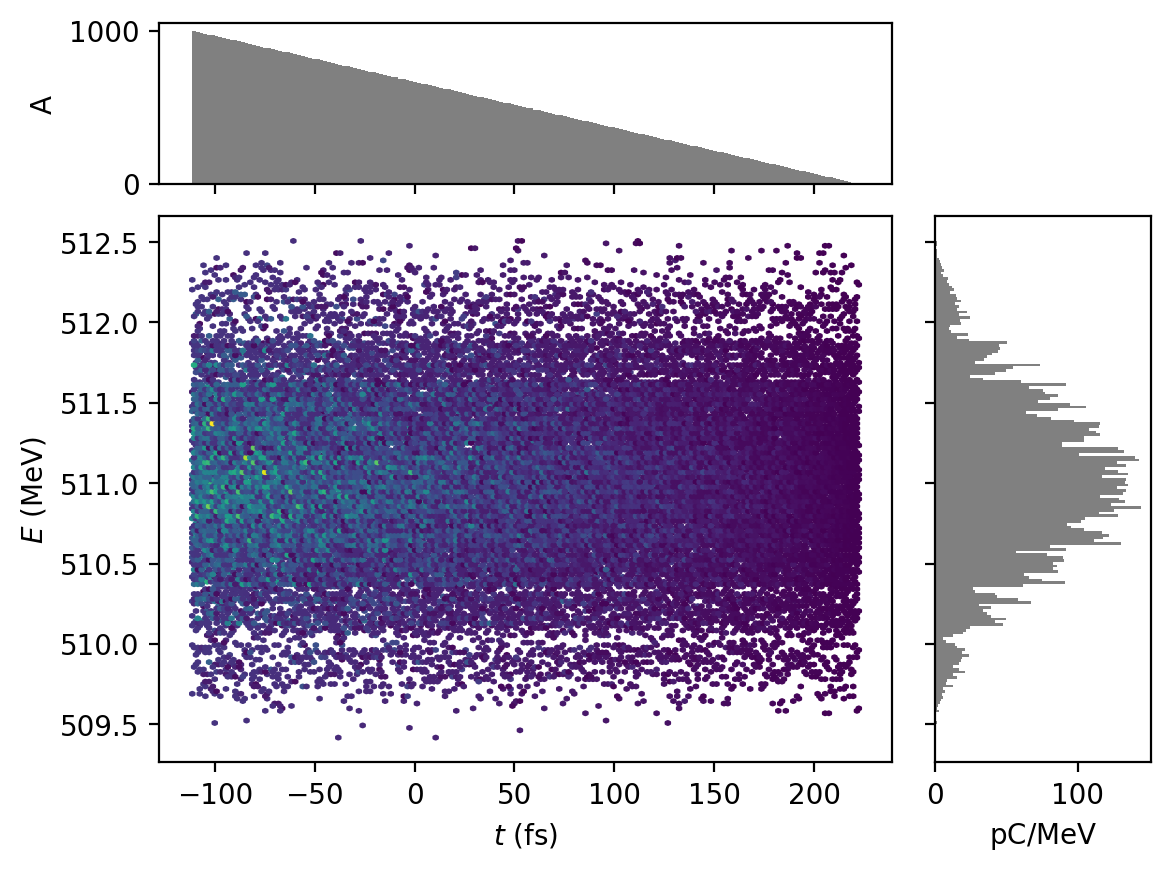

In [16]:
output.load_particles()
P1 = output.particles["end"]
P1.drift_to_z()
P1.plot("t", "energy")
P1

Resample particles for equal weights. This is neccessary when reading from a distribution file.

<ParticleGroup with 128000 particles at 0x7fdc929398e0>

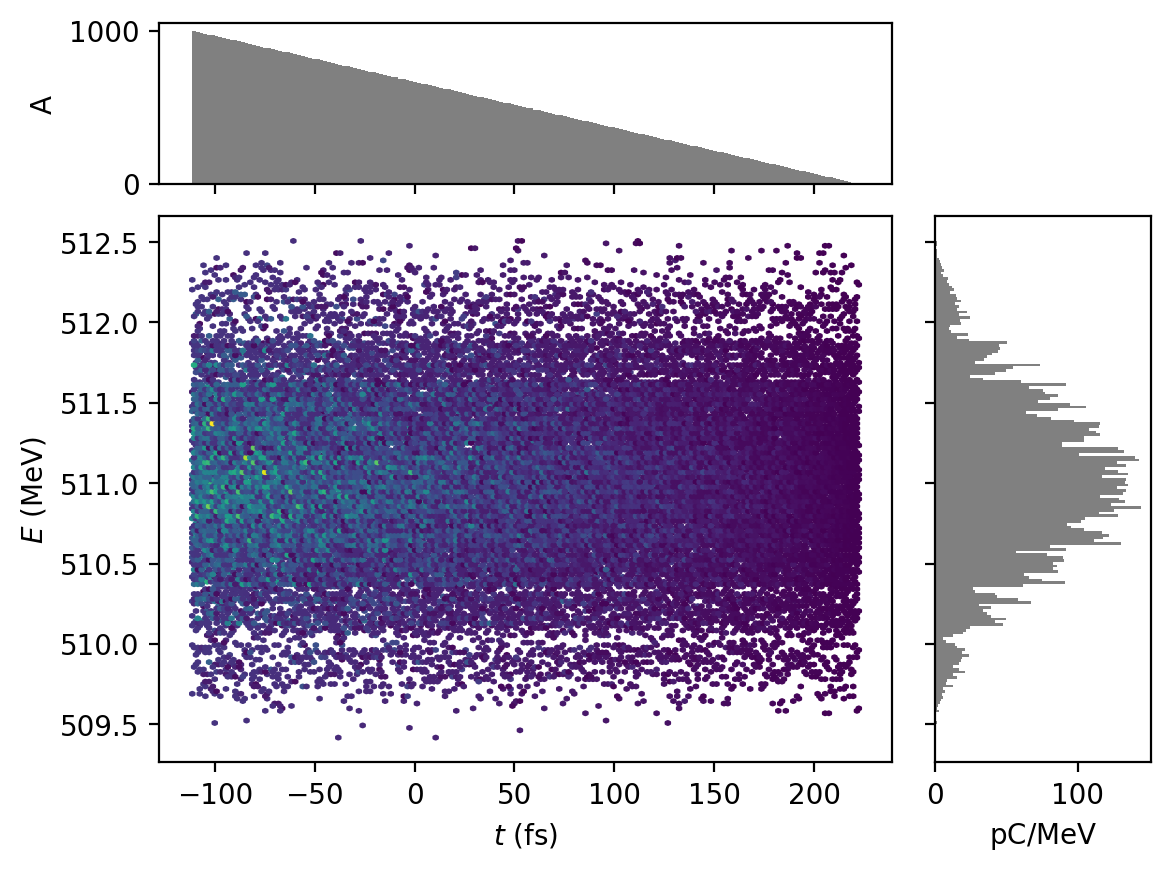

In [17]:
NSAMPLE = len(P1)
P1r = P1.resample(NSAMPLE)
P1r.plot("t", "energy")
P1r

Make a more interesting distribution from this:

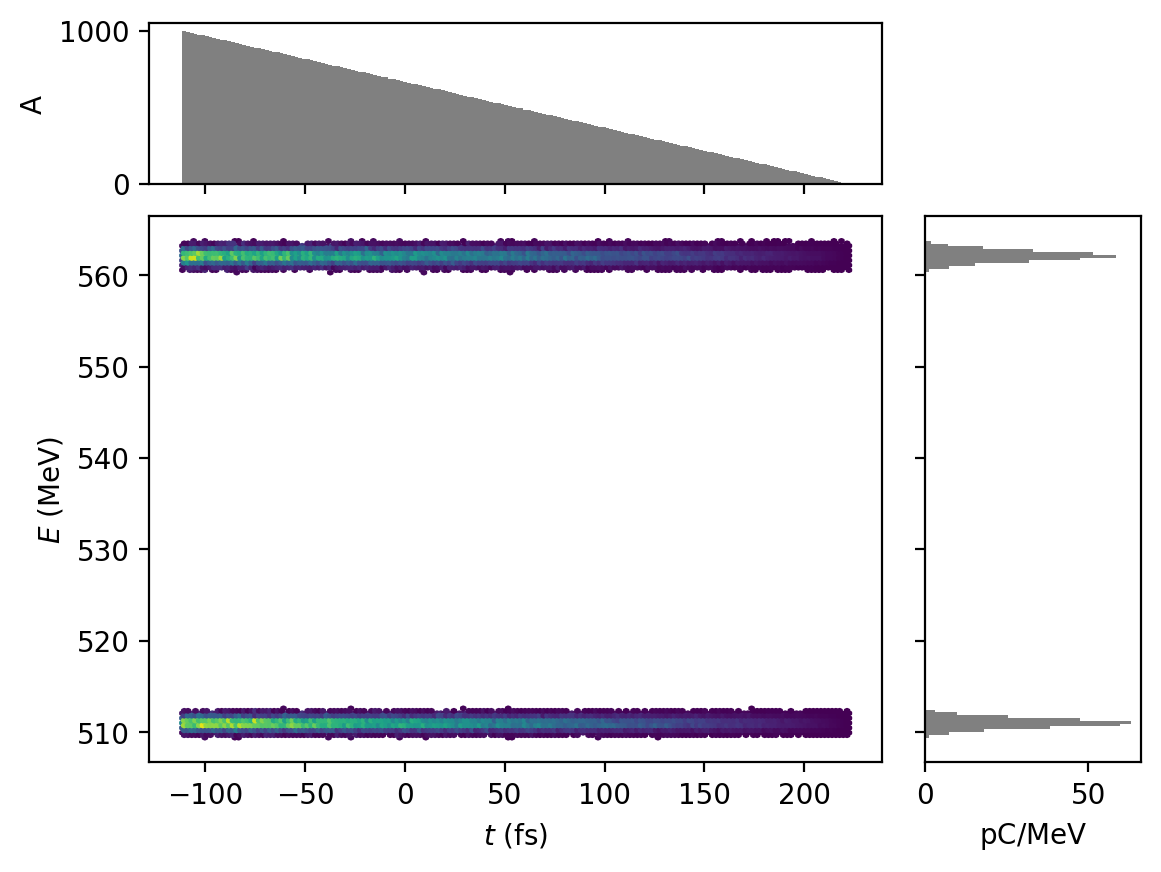

In [18]:
P1r.pz[0 : len(P1) // 2] *= 1.1
P1r.plot("t", "energy")

ParticleGroup can write to a file for Genesis4.

**Please note** that LUME-Genesis will write the distribution for you prior to running Genesis4, so this step is not necessary.

In [19]:
DIST_FILE = "genesis4_distribution.h5"
P1r.write_genesis4_distribution(DIST_FILE, verbose=True)

Resampling 128000 weighted particles


Datasets x, xp, y, yp, t, p written to: genesis4_distribution.h5


# ParticleGroup

Genesis4Input directly supports OpenPMD-beamphysics `ParticleGroup` instances.
When using the `MainInput.initial_particles` property setter, LUME-Genesis will ensure the namelist is added before the first "Track" or "Write" namelist in the main input.

It will implicitly set the `import_distribution` charge and the `time.slen` to the calculated time window from the particles, equivalent to the following:
```python
    import_distribution.charge = particles.charge
    main.time.slen = max(
        c_light * np.ptp(particles.t),
        np.ptp(particles.z),
    )
```

Additionally, the appropriate input file for Genesis4 will be written automatically when Genesis4 is executed.

In [20]:
main = g4.MainInput(
    namelists=[
        g4.Setup(
            rootname="drift_test",
            # lattice=full_path(LATFILE),
            beamline="LAT",
            gamma0=1000,
            lambda0=1e-07,
            delz=0.026,
            seed=123456,
            npart=512,
        ),
        g4.Time(),
        g4.Track(zstop=1),
        g4.Write(beam="end"),
    ],
)

G1 = g4.Genesis4(main, lattice, verbose=True, initial_particles=P1r)
output = G1.run()

Configured to run in: /tmp/tmpn7zpnzjf
Running Genesis4 in /tmp/tmpn7zpnzjf
/home/runner/miniconda3/envs/lume-genesis-dev/bin/genesis4 -l genesis.lat genesis4.in


---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by conda at 2024-06-10 16:25:29 [UTC] from Git Commit ID: 07004e4cb437003b4b6cf024122db18caee13722
Starting Time: Fri Sep 13 18:28:13 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file genesis.lat ...
Setting up time window of 100 microns with 1000 sample points...
Importing distribution file... 
Charge of external distribution: 1.66782e-10
Particles in external distribution: 128000
Analysing external distribution... 
Analysis of the imported distribution
   Total Bunch Length  (microns): 99.9125
   Length for Matching (microns): 99.9125
   Energy                  (MeV): 536.657
   Norm. Emittance in x (micron): 1.00613
   Norm. Emittance in y (micron): 1.00597
   Beta Function in x        (m): 10.04
   Beta Function in y        (m): 14.9275
   Alpha Function in x          : -0.934782
   Alpha Function in y          : 1.21251
   Beam center in x     (


Running Core Simulation...
Time-dependent run with 1000 slices for a time window of 100 microns
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
Writing output file...

Core Simulation done.
End of Track
Writing particle distribution to file: end.par.h5 ...



Program is terminating...
Ending Time: Fri Sep 13 18:28:14 2024
Total Wall Clock Time: 0.986128 seconds
-------------------------------------
Success - execution took 28.37s.


In [21]:
output.run

RunInfo(
  error_reason='',
  run_script='/home/runner/miniconda3/envs/lume-genesis-dev/bin/genesis4 -l genesis.lat genesis4.in',
  run_time=28.374795906999907,
)

In [22]:
output.load_particles()
P2 = output.particles["end"]
P2.z

array([4.03610105e-11, 2.27341167e-08, 5.33387058e-08, ...,
       9.99291767e-05, 9.99539173e-05, 9.99788933e-05])

<ParticleGroup with 512000 particles at 0x7fdc928ad880>

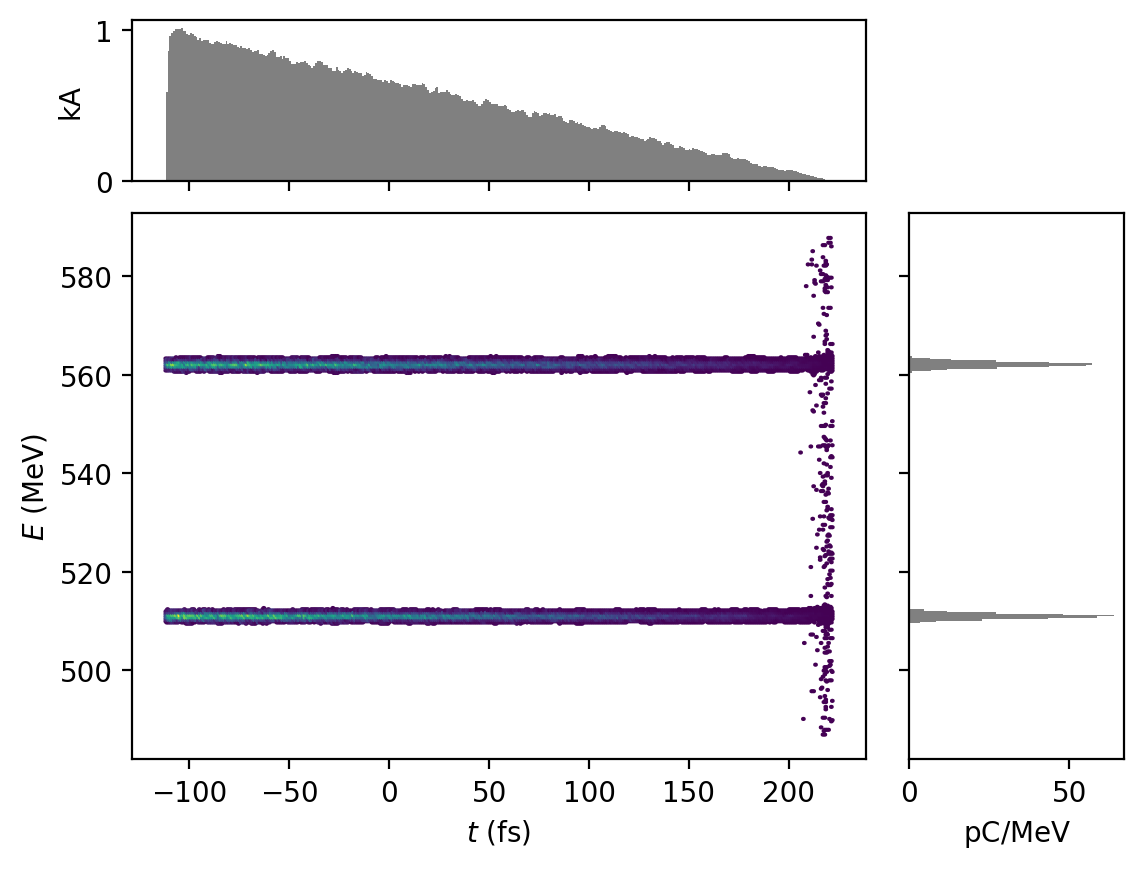

In [23]:
P2.drift_to_z()
P2.plot("t", "energy")
P2

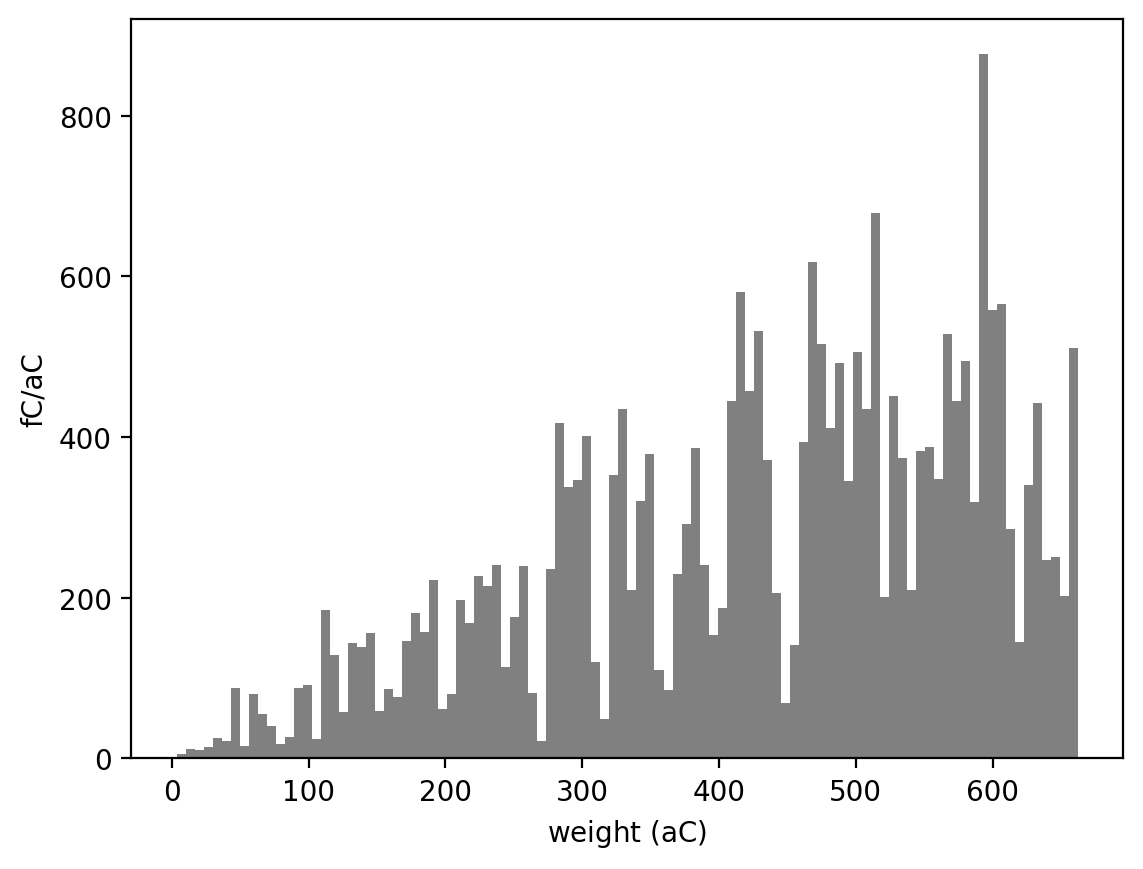

In [24]:
P2.plot("weight", bins=100)

Notice that `importdistribution` is filled in:

In [25]:
print(G1.input.to_genesis())

# Main input
&setup
  rootname = drift_test
  lattice = genesis.lat
  beamline = LAT
  gamma0 = 1000.0
  lambda0 = 1e-07
  delz = 0.026
  seed = 123456
  npart = 512
&end

&time
  slen = 9.999850899316347e-05
&end

&importdistribution
  file = initial_particles.h5
  charge = 1.6678221438112359e-10
&end

&track
  zstop = 1.0
&end

&write
  beam = end
&end

# Lattice
D1: drift = {l=1.0};
LAT: LINE = {D1};


# Cleanup

In [26]:
G1.input.initial_particles

<ParticleGroup with 128000 particles at 0x7fdc929398e0>

In [27]:
os.remove(DIST_FILE)